# Algorithm Explanation

In this notebook we will apply the k-means algorithm to an image to make it look like pixel art.

The algorithm works as follows:

First, K pixels (number of centers) of the image are randomly chosen, which will be the initial centers. In the following iterations we assign each pixel a center, which will be the closest. To calculate the new centers we average the pixels assigned to each center.

# Code of k-means algorithm

### Import of libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### K-means algorithm

In [2]:
def find_closest_center(X, centers):
    """
    Compute the closest center of each pixel of X
  
    Args:
    - X (numpy.ndarray): (m,n) Data set
    - centers (numpy.ndarray): K centers
    
    Returns:
    - idx (numpy.ndarray): (m,) Array that contains the index of the center that corresponds to each pixel
    """
  
    K = centers.shape[0]
    
    #List that will contain the index of the closest center to each pixel
    idx = np.zeros(X.shape[0], dtype=int)

    for i in range(X.shape[0]):
        
        #We calculate the distance at which the pixel is from the centers and
        #we assign to the pixel i the index of the nearest center
        distances = [np.linalg.norm(X[i] - centers[j]) for j in range(K)]
        idx[i] = np.argmin(distances)

    return idx

def compute_centers(X, idx, K):
    """
    Compute the new centers with the average of the pixels that have been assigned to said center

    Args:
    - X (numpy.ndarray): (m,n) Data set
    - idx (numpy.ndarray): (m,) Array that contains the index of the center that corresponds to each pixel
    - K (int): Number of centers

    Returns:
    - centers (numpy.ndarray): (K,n) New computed centers
    """

    m,n = X.shape
    centers = np.zeros((K,n))    #Array that will contain the centers

    for i in range(K):
        
        # Pixels that belong to the center of the position i
        pixels = X[idx==i]
        if(np.size(pixels) != 0):
            #We calculate the new center, which will be the mean of the points assigned to that center
            centers[i] = np.mean(pixels, axis=0)

    return centers

def compute_initial_centers(X, K):
    """
    Compute the initial centers randomly 

    Args:
    - X (numpy.ndarray): (m,n) Data set
    - K (int): Number of centers

    Returns:
    - centers (numpy.ndarray): (K,n) Initial centers
    """

    # Shuffle the indices randomly
    randid = np.random.permutation(X.shape[0])

    # Take the first K pixels as centers
    centers = X[randid[:K]]

    return centers

def run_kMeans(X, K, max_iters=10):
    """
    Run K-means algorithm

    Args:
    - X (numpy.ndarray): (m,n) Data set
    - K (int): Number of centers
    - max_iters (int): Maximum number of algorithm iterations

    Returns:
    - centers (numpy.ndarray): (K,n) Final centers
    - idx (numpy.ndarray): (m,) Array that contains the index of the center that corresponds to each pixel
    """

    centers = compute_initial_centers(X, K)
    previous_centers = centers

    for i in range(max_iters):
        print(f"Iteration: {i+1}/{max_iters}")
    
        #We obtain the list with the index of the center to which each pixel is assigned
        idx = find_closest_center(X, centers)

        #Compute the new centers
        centers = compute_centers(X, idx, K)

        if((centers == previous_centers).all()):
            print("No further iterations are necessary.")
            break
        else:
            previous_centers = centers

    return centers, idx

# Image visualization

Original image shape: (300, 300, 3)


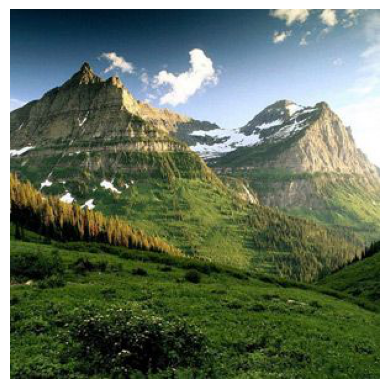

In [3]:
# Type the route of the image
# (RECOMMENDATION: choose an image (NOT PNG) with small dimensions, like 300x300, otherwise the algorithm takes too long)
route_img = "image.jpg"

original_img = plt.imread(route_img)
plt.imshow(original_img)
plt.axis('off')

print(f"Original image shape: {original_img.shape}")

flatten_img = np.reshape(original_img, (original_img.shape[0]*original_img.shape[1], 3))

### Calculation of the new image

In [4]:
# Número de colores que tendrá la imagen
# Number of colors that the image will have
K = 16

max_iters = 10
X_img = flatten_img/255

# Final centers and index of the center that belongs to each pixel
centers, idx = run_kMeans (X_img, K, max_iters)

# Matrix in original format with the values of the pixels depending on the assigned center
X_recovered = np.reshape(centers[idx, :], original_img.shape)

pixelArt_img = np.round(X_recovered*255).astype(int)

Iteration: 1/10
Iteration: 2/10
Iteration: 3/10
Iteration: 4/10
Iteration: 5/10
Iteration: 6/10
Iteration: 7/10
Iteration: 8/10
Iteration: 9/10
Iteration: 10/10


### Image Comparison: Original - Pixel Art

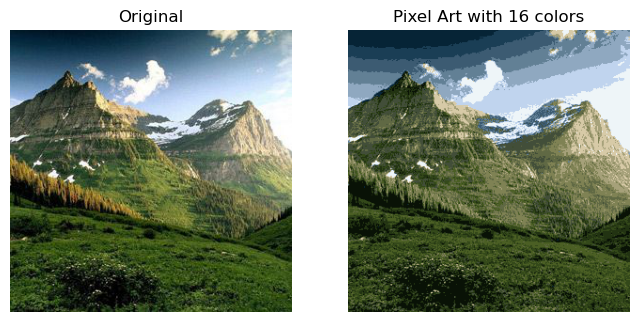

In [5]:
fig,ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()

ax[1].imshow(pixelArt_img)
ax[1].set_title(f'Pixel Art with {K} colors')
ax[1].set_axis_off()

### Pixel Art Image visualization

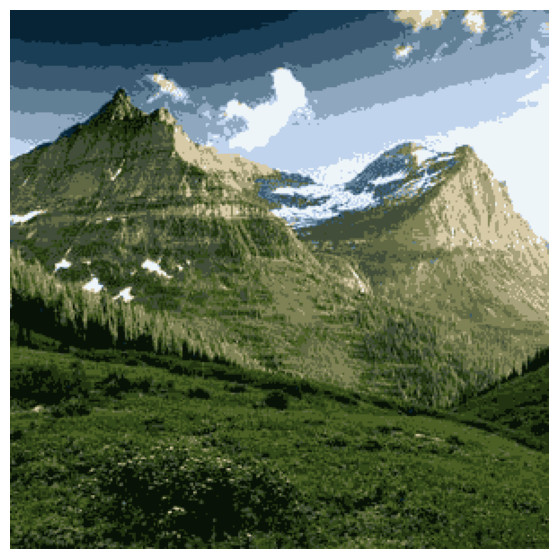

In [6]:
plt.figure(figsize=(7,7))
plt.imshow(pixelArt_img)
plt.axis('off')
plt.show()

# Algorithm with sklearn

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans = KMeans(n_clusters = 16, n_init="auto", max_iter=100)

# Index of the center that corresponds to each pixel
idx = kmeans.fit_predict(flatten_img)
centers = kmeans.cluster_centers_.astype(int)

In [9]:
X_recovered = np.reshape(centers[idx, :], original_img.shape)

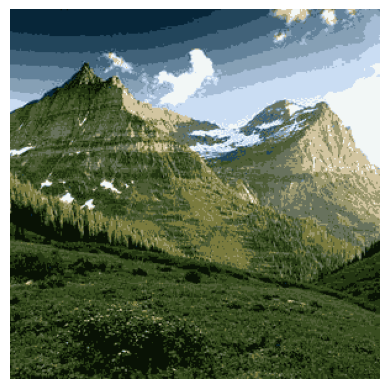

In [10]:
plt.imshow(X_recovered)
plt.axis('off')
plt.show()